In [3]:
#load the dataset 
df = pd.read_csv("retail_sales_dataset.csv")
print("dataset loaded successfully")
df.head()

dataset loaded successfully


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#convert data column to datatime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11912\1000244018.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [23]:
#gregate sales data by month and category
df_grouped = df.groupby([df['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().unstack()
df_grouped.index = df_grouped.index.astype(str)  # Convert Period index to string

print("Aggregated Monthly Sales Data:")
print(df_grouped.head())


Aggregated Monthly Sales Data:
Product Category   Beauty  Clothing  Electronics
Date                                            
2023-01           12430.0   13125.0       9895.0
2023-02           14035.0   14560.0      15465.0
2023-03           10545.0   15065.0       3380.0
2023-04           11905.0   13940.0       8025.0
2023-05           12450.0   17455.0      23245.0


<Figure size 1200x600 with 0 Axes>

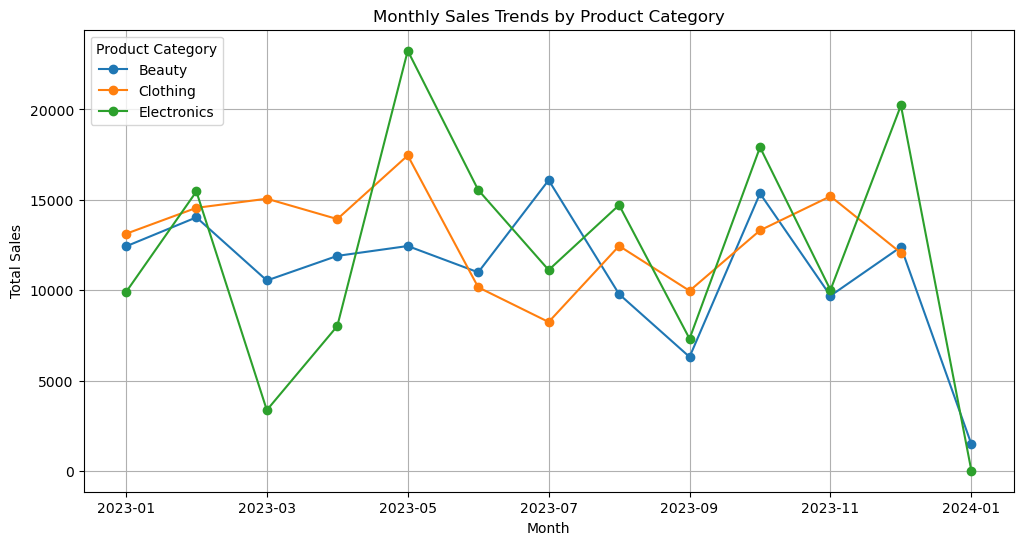

In [25]:
plt.figure(figsize=(12,6))
df_grouped.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

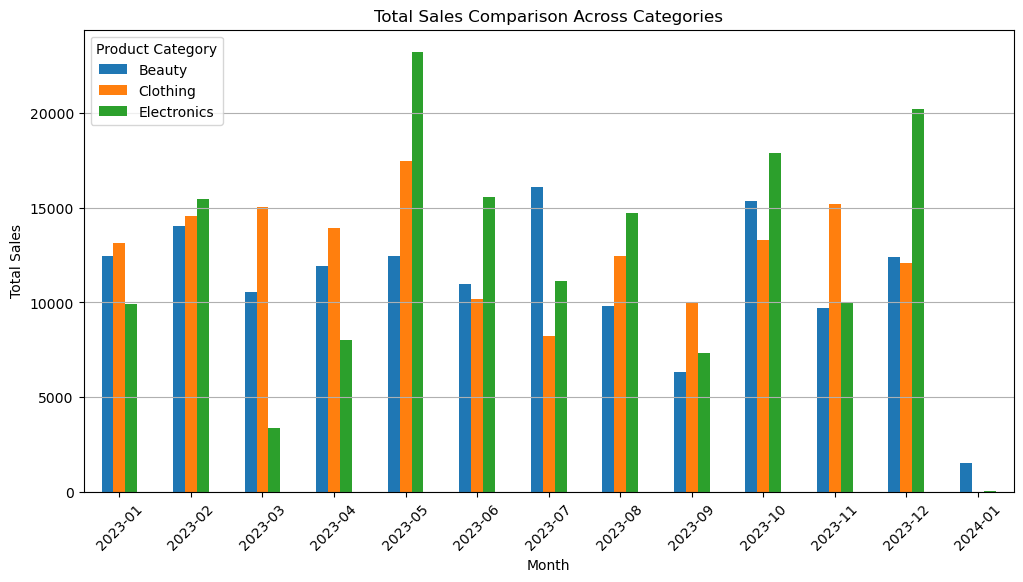

In [27]:
plt.figure(figsize=(10,6))
df_grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Sales Comparison Across Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


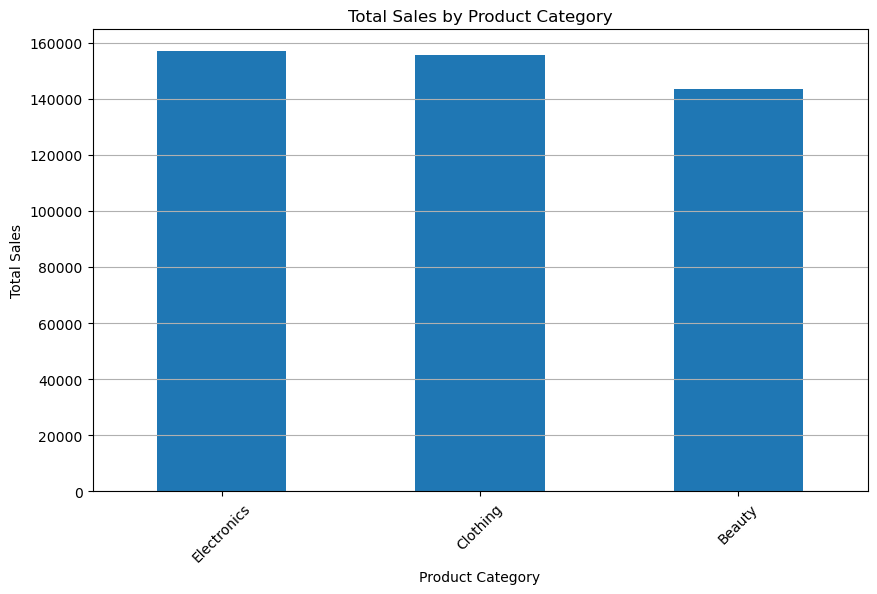

In [29]:
# overall total sales by product category
df_category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
df_category_sales.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


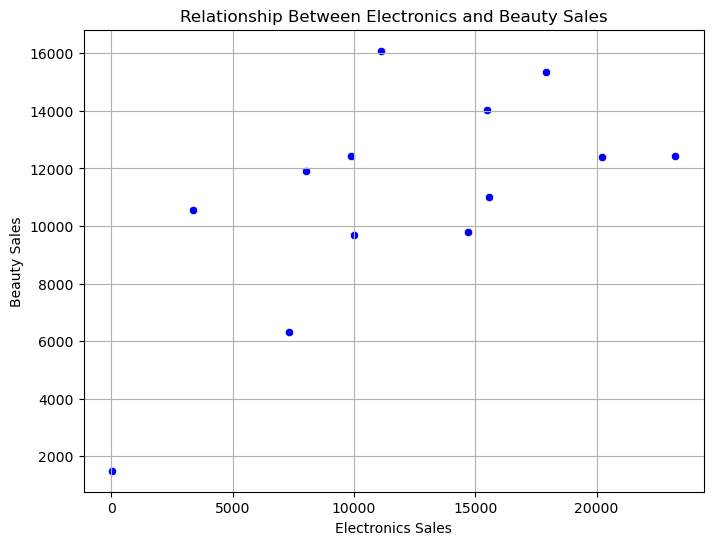

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_grouped['Electronics'], y=df_grouped['Beauty'], color='blue')
plt.title('Relationship Between Electronics and Beauty Sales')
plt.xlabel('Electronics Sales')
plt.ylabel('Beauty Sales')
plt.grid(True)
plt.show()

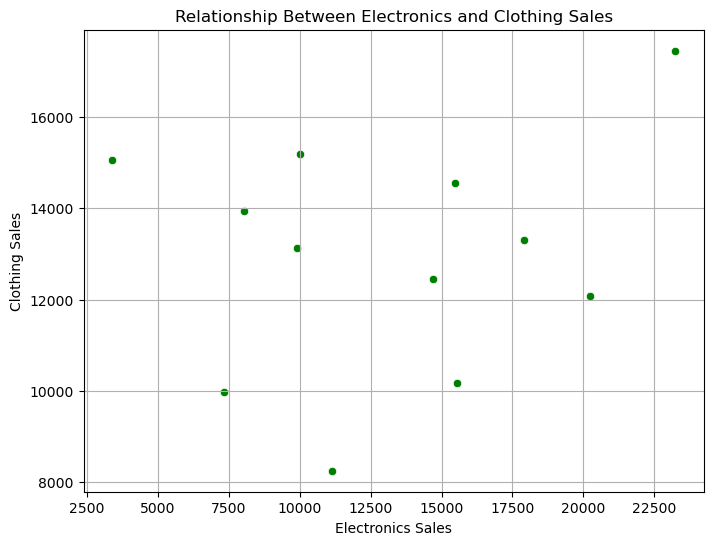

In [35]:
# analyze the relationship between sales of Electronics and clothin products
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_grouped['Electronics'], y=df_grouped['Clothing'], color='green')
plt.title('Relationship Between Electronics and Clothing Sales')
plt.xlabel('Electronics Sales')
plt.ylabel('Clothing Sales')
plt.grid(True)
plt.show()
